# We Start by merging code from Two earlier notebooks...

## From Explicit Solutions

In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

## From Test-recurisons

In [2]:
import numpy as np
import sys, math

In [3]:
projectPath = '/home/mathias/programming/almost-infinite-sites-recursions'
sys.path.insert(0,projectPath)
import formula_outline as fo
#from configurations import configuration_new as conf

## Infinite Sites exact solver

In [4]:
'''j \in d_coal[i] signifies that matrix j can be obtained by coalescing two rows from i'''
d_coal_FS = {4:set([0]) ,
          10:set([2]),
          13:set([1]),
          19:set([3]) }

In [5]:
'''
j in d_mut_FS[i] signifies that j and i are 1 mutation-event appart in the finite sites-model.
Note that the recursion terminates when N = 1, and hence, that for instance 1 in d_mut_FS[0] does not hold.
'''
d_mut_FS = {
         4:set([5,6,7,8]),
         5:set([4,9,10,11]),
         6:set([4,9,12,13]),
         7:set([4,10,12,14]),
         8:set([4,11,13,14]),
         9:set([5,6,15,16]),
         10:set([5,7,15,17]),
         11:set([5,8,16,17]),
         12:set([6,7,15,18]),
         13:set([6,8,16,18]),
         14:set([7,8,17,18]),
         15:set([9,10,12,19]),
         16:set([9,11,13,19]),
         17:set([10,11,14,19]),
         18:set([12,13,14,19]),
         19:set([15,16,17,18])
        }

def checkSymmetry(d):
    '''
    An auxiliary function which will catch the odd input-error :p
    Returns True if (j in d[i]) implies (i in d[j]) for all i and j, and Flase if not
    '''
    for key,val in d.iteritems():
        for j in val:
            if not (key in d[j]):
                #print key,val,j,d[j]
                return False
    return True

checkSymmetry(d_mut_FS)

True

In [6]:
def coeficientMatrix(theta, d_mut = d_mut_FS, d_coal = d_coal_FS, Nr = lambda x: 1.0, Nc = lambda x: 1.0):
    '''
    returns the coeffieient matrix for the linear system given by the griffiths-tavare-recursions expressed as a
    homogeneous linear system.
    
    theta : a non-negative float.
    
    d_mut : a dictionary where d_mut[i] contains a list of all indices of matrices connected to i by one mutation.
    
    d_coal: a dictionary where d_mut[i] contains a set of all indices of matrices may be transformed into matrix i by
            merging two identical rows; e.g. d_coal[0] == set([4]).
            
    Note that the correct coefficient matrix is only returned if the matricees are as outlined in the above comment!
    '''
    dim1 = len(d_coal)
    dim = len(d_mut) + len(d_coal)
    theta = float(theta)
    
    if theta < 0:
        raise ValueError('\'theta\' should be a non-negative number.')
    
    if not checkSymmetry(d_mut):
        raise UserWarning('warning: d_mut is not symmetric.')
        
        
    #bdr = np.eye(4,dim)
    A = np.r_[np.eye(dim1,dim),
              np.zeros((dim-dim1,dim))]

    for i in range(dim1,dim):
        A[i,i] = -1.0
    
    for i,neigbours in d_mut.iteritems():
        n = 2
        p_mut = ( theta / ( n-1 + theta ) )
        for j in neigbours:
            A[i,j] = p_mut * ( Nr(j) * Nc(j) / 4.0 )
    
    for i,neighbours in d_coal.iteritems():
        n = 2
        p_coal = ( n-1 ) / (theta + n-1)
        for j in neighbours:
            A[i,j] = p_coal
            
    return A

def inhomogeneity(bdr_cnd,zeroDim = 16):
    return np.r_[bdr_cnd,np.zeros(zeroDim)]

Using this, we can implement a map $(\theta,\pi) \mapsto (x,A,b)$ s.t. $Ax = b$.

In [7]:
def solve_GT_recursions(thetas,pis):
    '''
    Solve the Griffiths-and tavare-recursions explicitly for any (theta,pi) such that theta is an element of thetas,
    and pi is an element of pis.
    
    Returns three dictionaries:
      solutions,
      Ms,
      bs,
    which are indexed by keysets thetas, pis and ((theta,pi) for theta in thetas for pi in pis) respectively.
    There satisfy that the linear equation
    
      bs[pi] = Ms[theta] * solutions[(theta,pi)]
    
    holds for any choice of pi in pis and theta in thetas.
    '''
    solutions = {}
    Ms = {}
    bs = {}
    for pi in pis:
        b = inhomogeneity(pi)
        bs[pi] = b
        for theta in thetas:
            M = coeficientMatrix(theta)
            Ms[theta] = M
            solutions[(theta,pi)] = np.linalg.solve(M,b)
    return solutions,Ms,bs

### Using the Solver to generate Figures

In [8]:
def generate_figure_paths(figure_name,
                          file_prefix = 'explicit_solutions_',
                          figurepath = '/home/mathias/Dropbox/doccuments/papers-in-progress/almost-infinite-sites-recursions/infinite-sites-model/graphics/',
                          file_extensions = ['.pdf','.png','.eps','.jpeg']):
    '''Returns a list of full paths for exporting figures'''
    return ['%s%s%s%s'%(figurepath,file_prefix,figure_name,extension) for extension in file_extensions]

## The Almost Infinite Sites model

### Building a solver

In [9]:
def Nr_AIS(j):
#     return 1.0 + float(j in (3,6,9))
    return 1.0 + float(j in (3,6,9,7)) # This is a HACK. The factor in front 

def Nc_AIS(j):
    return 1.0 + float(j in (3,5,9))

In [10]:
d_coal_AIS = {
    3:set([0]),
    6:set([1]),
    9:set([2])
}

In [11]:
d_mut_AIS = {
    3:set([4]),
    4:set([3,5,6,7]),
    5:set([4,8]),
    6:set([4,8]),
    7:set([4,8]),
    8:set([5,6,7,9]),
    9:set([8])
}
checkSymmetry(d_mut_AIS)

True

This is really all we need to implement the explicit solution of the almost infinite sites model.

In [12]:
pi1_AIS = [0.25, 0.5, 0.25]
pi2_AIS = [1.0 , 0.0 , 0.0]
M1_AIS = coeficientMatrix(1.0, d_mut = d_mut_AIS, d_coal = d_coal_AIS, Nr = Nr_AIS, Nc = Nc_AIS)
b1_AIS = inhomogeneity(pi1_AIS,7)
b2_AIS = inhomogeneity(pi2_AIS,7)
x1_AIS = np.linalg.solve(M1_AIS,b1_AIS)
x2_AIS = np.linalg.solve(M1_AIS,b2_AIS)

Satisfies with brief tests, we now *write* a solver, similar to for the Griffiths-tavare-case:

In [13]:
def solve_AIS_recursions(thetas,pis):
    '''
    Solve the Almost Infinite Sites-recursions explicitly for any (theta,pi) such that theta is an element of thetas,
    and pi is an element of pis.
    
    Returns three dictionaries:
      solutions,
      Ms,
      bs,
    which are indexed by keysets thetas, pis and ((theta,pi) for theta in thetas for pi in pis) respectively.
    There satisfy that the linear equation
    
      bs[pi] = Ms[theta] * solutions[(theta,pi)]
    
    holds for any choice of pi in pis and theta in thetas.
    '''
    solutions = {}
    Ms = {}
    bs = {}
    for pi in pis:
        b = inhomogeneity(pi,7)
        bs[pi] = b
        for theta in thetas:
            M = coeficientMatrix(theta, d_mut = d_mut_AIS, d_coal = d_coal_AIS, Nr = Nr_AIS, Nc = Nc_AIS)
            Ms[theta] = M
            solutions[(theta,pi)] = np.linalg.solve(M,b)
    return solutions,Ms,bs

### PLOTS!

In [15]:
thetas = np.logspace(-4,3,num=100)
pi1_AIS = (0.25, 0.5, 0.25)
pi2_AIS = (1.0 , 0.0 , 0.0)
pis_AIS = (pi1_AIS,pi2_AIS)

solutions_AIS,Ms_AIS,bs_AIS = solve_AIS_recursions(thetas,pis_AIS)

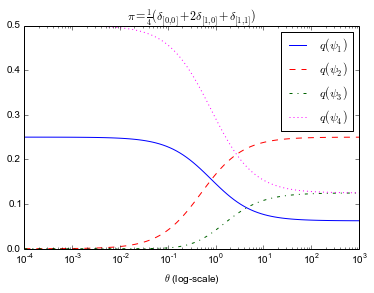

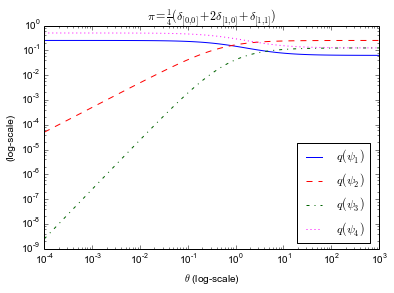

In [16]:
labels = {
    3: r'$q(\psi_1)$',
    4: r'$q(\psi_2)$',
    5: r'$q(\psi_3)$',
    6: r'$q(\psi_4)$',
    7: r'$q(\psi_5)$',
    8: r'$q(\psi_6)$',
    9: r'$q(\psi_7)$'
}
'''
[‘solid’ | ‘dashed’, ‘dashdot’, ‘dotted’ | (offset, on-off-dash-seq) | '-' | '--' | '-.' | ':' | 'None' | ' ' | '']
'''
styles = {
    3: 'solid',
    4: 'dashed',
    5: 'dashdot',
    6: 'dotted',
    7: 'dashdot',
    8: ':',
    9: 'solid'    
}

colors ={
    3: 'blue',
    4: 'red',
    5: 'darkgreen',
    6: 'magenta',
    7: 'brown',
    8: 'darkorange',
    9: 'orchid'
}


plt.figure(3)
#plt.subplot(211)
for i in (3,4,5,6):
    likelihhods = [solutions_AIS[(theta,pi1_AIS)][i] for theta in thetas]
    plt.plot(thetas,likelihhods, label = labels[i], linestyle = styles[i], color = colors[i])
#plt.legendnd()
plt.legend()
plt.xscale('log')
plt.xlabel('$\\theta$ (log-scale)')
plt.title('$\pi = \\frac{1}{4}(\delta_{[0 , 0]} + 2\delta_{[1 , 0]} + \delta_{[1 , 1]})$')

figure_paths = generate_figure_paths('AIS_symetric_boundary')
#for path in figure_paths:
    #plt.savefig(path)

plt.show()
plt.close()

plt.figure(4)
#plt.subplot(212)
for i in (3,4,5,6):
    likelihhods = [solutions_AIS[(theta,pi1_AIS)][i] for theta in thetas]
    #plt.plot(thetas,likelihhods, label = 'i = %i'%i)
    plt.plot(thetas,likelihhods, label = labels[i], linestyle = styles[i], color = colors[i])
#plt.legendnd()
plt.legend(bbox_to_anchor=(0.99, 0.50))
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$\\theta$ (log-scale)')
plt.ylabel('(log-scale)')
#plt.title('$q_i$ for $i \\in \\{ 3,4,5\\}$, $\pi = \\frac{1}{4}(\delta_0 + 2\delta_1 + \delta_2)$')
plt.title('$\pi = \\frac{1}{4}(\delta_{[0 , 0]} + 2\delta_{[1 , 0]} + \delta_{[1 , 1]})$')

figure_paths = generate_figure_paths('AIS_symetric_boundary_log-log')
#for path in figure_paths:
    #plt.savefig(path)

plt.show()
plt.close()

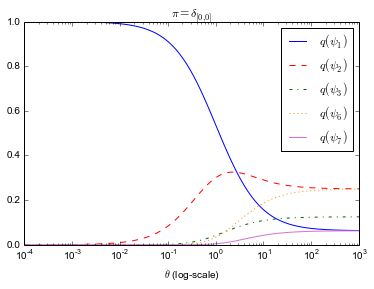

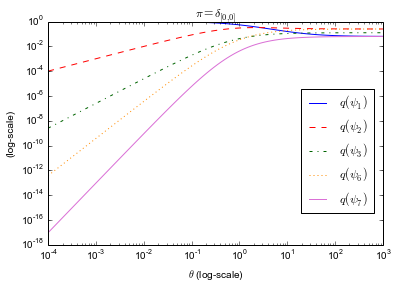

In [17]:
plt.figure(3)
for i in (3,4,5,8,9):
    likelihhods = [solutions_AIS[(theta,pi2_AIS)][i] for theta in thetas]
    plt.plot(thetas,likelihhods, label = labels[i], linestyle = styles[i], color = colors[i])
plt.xscale('log')
plt.xlabel(r'$\theta$ (log-scale)')
plt.title(r'$\pi = \delta_{[0, 0]}$')
plt.legend()

figure_paths = generate_figure_paths('AIS_non-symetric_boundary')
#for path in figure_paths:
    #plt.savefig(path)

plt.show()
plt.close()

plt.figure(4)
for i in (3,4,5,8,9):
    likelihhods = [solutions_AIS[(theta,pi2_AIS)][i] for theta in thetas]
    plt.plot(thetas,likelihhods, label = labels[i], linestyle = styles[i], color = colors[i])
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$\theta$ (log-scale)')
plt.ylabel('(log-scale)')
plt.title(r'$\pi = \delta_{[0, 0]}$')
plt.legend(bbox_to_anchor=(0.99, 0.725))

figure_paths = generate_figure_paths('AIS_non-symetric_boundary_log-log')
#for path in figure_paths:
    #plt.savefig(path)

plt.show()
plt.close()

## Step 1: Set up the environment and test-cases

## Test cases

In [18]:
S1 = np.matrix([0])
nR1 = np.array([1])
nC1 = np.array([1])
nC1_1 = np.array([1000])
# phi1 = conf(S1,nR1,nC1)
# phi2 = conf(S1,nR1,nC1)

S2 = np.matrix([[1,1,0,0],[0,1,1,0]])
nC2 = np.array([1,1,1,1])
nR2 = np.array([1,1])

## Tests

### Test 1

In [19]:
prob,table = fo.prob_External(S1,nR1,nC1_1,b = 3)

In [20]:
prob, table

(1.0, <configurationTable.configTable at 0x7f93d070cd10>)

In [21]:
table.get_all_configurations()

{<class 'configurationTable.node'>
 ({'rows': 1, 'S': matrix([[0]]), 'nC': array([1000]), 'nR': array([1]), 'columns': 1}): {3: 1.0}}

In [22]:
table.get_size()

(1, 1)

### Test 2

In [23]:
prob2, table2 = fo.prob_External(S2,nR2,nC2,b=3)
prob3, table3 = fo.prob_External(S2,nR2,nC2,b=4)
prob4, table4 = fo.prob_External(S2,nR2,nC2,b=5)

In [24]:
print (len(table2.__node_table__),) + table2.get_size()
print table3.get_size()
print table4.get_size()

(32, 32, 38)
(111, 165)
(302, 515)


In [25]:
prob2,prob3,prob4

(0.0, 0.00010850694444444444, 0.00015371817129629625)

In [26]:
prob3/prob4

0.70588235294117663

In [27]:
prob5, table5 = fo.prob_External(S2,nR2,nC2,b=6)
prob6, table6 = fo.prob_External(S2,nR2,nC2,b=7)

In [28]:
print table5.get_size()
print table6.get_size()

(591, 1128)
(963, 2110)


In [29]:
print prob4/prob5
print prob5/prob6
print prob2,prob3,prob5,prob5,prob6

0.867162592986
0.945768248252
0.0 0.000108506944444 0.000177265685282 0.000177265685282 0.000187430362152


# Test 3

In [30]:
S3 = np.matrix([[1 , 0] ,[0 , 0]])
nR3 = np.array([1 , 2])
nC3 = np.array([1, 99])

In [31]:
prob1,table1 = fo.prob_External(S3,nR3,nC3,b = 1)
prob2,table2 = fo.prob_External(S3,nR3,nC3,b = 2)
prob3,table3 = fo.prob_External(S3,nR3,nC3,b = 3)

In [32]:
print table1.get_size()
print table2.get_size()
print table3.get_size()

(27, 27)
(58, 83)
(165, 259)


In [33]:
conf1 = table1.get_all_configurations()
i = 0
for key,val in conf1.iteritems():
    if max(val.values()) > 0: print key,val,'\n'
    #print i,'\n',key,val,'\n'
    #i+=1

 100 
=====
 -  ||  1 {0: 1.0} 

 100 
=====
 -  ||  2 {0: 0.5} 

 1 99 
 + -  ||  1
 - -  ||  1 {1: 0.083333333333333329} 

 100 
=====
 -  ||  3 {0: 0.33333333333333331} 

 1 99 
 + -  ||  1
 - -  ||  2 {1: 0.064814814814814811} 



In [34]:
conf2 = table2.get_all_configurations()
i = 0
for key,val in conf2.iteritems():
    if max(val.values()) > 0:
        print key,val,'\n'
        i += 1
print i

 99 1 
 - -  ||  2
 - o  ||  1 {0: 0.0, 1: 0.064814814814814811} 

 100 
=====
 -  ||  2 {0: 0.5, 1: 0.5} 

 100 
=====
 -  ||  1 {0: 1.0, 1: 1.0} 

 99 1 
 - -  ||  2
 - x  ||  1 {0: 0.0, 1: 0.064814814814814811} 

 100 
=====
 -  ||  3 {0: 0.33333333333333331, 1: 0.33333333333333331} 

 99 1 
 - +  ||  2
 - -  ||  1 {1: 0.027777777777777776} 

 99 1 
 - -  ||  1
 - x  ||  1 {0: 0.0, 1: 0.083333333333333329} 

 99 1 
 - -  ||  1
 - o  ||  1 {0: 0.0, 1: 0.083333333333333329} 

 99 1 
 - -  ||  1
 - +  ||  1 {0: 0.0, 1: 0.083333333333333329, 2: 0.083472222222222212} 

 99 1 
 - -  ||  2
 - +  ||  1 {0: 0.0, 2: 0.064929698216735249} 

10


In [35]:
conf3 = table3.get_all_configurations()
i = 0
for key,val in conf3.iteritems():
    if max(val.values()) > 0:
        print key,val,'\n'
        i += 1
print i

 99 1 
 - -  ||  2
 - +  ||  1 {0: 0.0, 1: 0.064814814814814811, 3: 0.065009008567037563} 

 98 1 1 
 - + -  ||  1
 - - +  ||  1 {0: 0.0, 1: 0.0, 2: 0.013749999999999998} 

 99 1 
 - +  ||  1
 - o  ||  1 {0: 0.0, 1: 0.0, 2: 0.00013888888888888886} 

 100 
=====
 -  ||  1 {0: 1.0, 1: 1.0, 2: 1.0} 

 98 2 
 - -  ||  2
 - +  ||  1 {0: 0.0, 1: 0.0, 2: 0.0046682098765432091} 

 99 1 
 - -  ||  1
 - +  ||  1
 - o  ||  1 {0: 0.0, 1: 0.0, 2: 0.0001371742112482853} 

 99 1 
 - -  ||  1
 - +  ||  2 {0: 0.0, 1: 0.027777777777777776, 2: 0.027872085048010972} 

 98 1 1 
 - - -  ||  1
 - + -  ||  1
 - - o  ||  1 {0: 0.0, 1: 0.0, 2: 0.0095061728395061731} 

 99 1 
 - -  ||  1
 - +  ||  1
 - x  ||  1 {0: 0.0, 1: 0.0, 2: 0.0001371742112482853} 

 98 1 1 
 - + -  ||  1
 - - o  ||  1 {0: 0.0, 1: 0.0, 2: 0.013749999999999998} 

 98 2 
 - -  ||  1
 - +  ||  1 {0: 0.0, 1: 0.0, 2: 0.0068749999999999992} 

 99 1 
 - -  ||  2
 - o  ||  1 {0: 0.0, 1: 0.064814814814814811, 2: 0.064929698216735249} 

 98 1 1 
 - 

# Test 4

In [36]:
S4 = np.matrix([[1 , 0] ,[0 , 0]])
nR4 = np.array([1 , 1])
nC4 = np.array([1, 1])
P4 = np.matrix([[0.0 , 1.0 , 0.0 , 0.0],
                [1.0 , 0.0 , 0.0 , 0.0],
                [0.0 , 1.0 , 0.0 , 0.0],
                [1.0 , 0.0 , 0.0 , 0.0]])

In [37]:
prob1,table1 = fo.prob_External(S4,nR4,nC4,b = 1, P=P4)
prob2,table2 = fo.prob_External(S4,nR4,nC4,b = 2, P=P4)
prob3,table3 = fo.prob_External(S4,nR4,nC4,b = 3, P=P4)
prob4,table4 = fo.prob_External(S4,nR4,nC4,b = 4, P=P4)

In [38]:
prob5,table5 = fo.prob_External(S4,nR4,nC4,b = 5, P=P4)
prob6,table6 = fo.prob_External(S4,nR4,nC4,b = 6, P=P4)
prob7,table7 = fo.prob_External(S4,nR4,nC4,b = 7, P=P4)

In [39]:
prob8,table8 = fo.prob_External(S4,nR4,nC4,b = 8, P=P4)
prob9,table9 = fo.prob_External(S4,nR4,nC4,b = 9, P=P4)
prob10,table10 = fo.prob_External(S4,nR4,nC4,b = 10, P=P4)

In [41]:
prob100,table100 = fo.prob_External(S4,nR4,nC4,b = 100, P=P4)

In [42]:
conf100 = table100.get_all_configurations()
i = 0

def mylog(p):
    if p> 0: return math.log10(p)
    else: return float('-inf')

for key,val in conf100.iteritems():
    if max(val.values()) > 0:
        print key,'\n'
        for b,p in val.iteritems():
            print '\tb=%i\tp=%.15f\tlog(p) = %.15f'%(b,p,mylog(p))
        print '\n\n'

 1 1 
=====
 + -  ||  1
 - +  ||  1 

	b=1	p=0.000000000000000	log(p) = -inf
	b=3	p=0.062500000000000	log(p) = -1.204119982655925
	b=5	p=0.078125000000000	log(p) = -1.107209969647868
	b=7	p=0.082031250000000	log(p) = -1.086020670577930
	b=9	p=0.083007812500000	log(p) = -1.080881030925519
	b=11	p=0.083251953125000	log(p) = -1.079605568975277
	b=13	p=0.083312988281250	log(p) = -1.079287287918962
	b=15	p=0.083328247070312	log(p) = -1.079207754088156
	b=17	p=0.083332061767578	log(p) = -1.079187872906074
	b=19	p=0.083333015441895	log(p) = -1.079182902752757
	b=21	p=0.083333253860474	log(p) = -1.079181660223316
	b=23	p=0.083333313465118	log(p) = -1.079181349591511
	b=25	p=0.083333328366280	log(p) = -1.079181271933594
	b=27	p=0.083333332091570	log(p) = -1.079181252519117
	b=29	p=0.083333333022892	log(p) = -1.079181247665498
	b=31	p=0.083333333255723	log(p) = -1.079181246452093
	b=33	p=0.083333333313931	log(p) = -1.079181246148742
	b=35	p=0.083333333328483	log(p) = -1.079181246072904
	b=37	p=0

# Notes

* TakeGenerate a figure like Lyngsoe (split figure 7)
* Real data and a likelihood curve
* How big data can we run (a table that a researcher can look at and say: 'Will my dataset run on this?')

In [308]:
from configurations import configuration_new as conf
import formula_outline as fo

In [309]:
psi_test = conf(S4,nR4,nC4)
# psi_2_no_mut = conf(np.matrix([0]), np.array([2]), np.array([2]))
# print psi_test
# print psi_2_no_mut
fo.prob_External(S4,nR4,nC4,b=1,P = P4)
# p, table = fo.prob_External(np.matrix([0]), np.array([2]), np.array([2]), b = 6, P = P4)

(0.25, <configurationTable.configTable at 0x7f93ce9e1910>)

In [310]:
print psi_test

 1 1 
=====
 + -  ||  1
 - -  ||  1


In [311]:
# for x in table.get_all_configurations():
#     print x,'\n',table.__node_table__[x],'\n'

In [312]:
#thetas_small_example = [0.0001 , 0.001, 0.01, 0.1, 1.0, 10, 100, 1000]
thetas_small_example = list(np.logspace(-4.5,4.5,num=201))
pis_small_example = [(1.0 , 0.0 , 0.0)]
solutions_AIS,Ms_AIS,bs_AIS = solve_AIS_recursions(thetas,pis_AIS)

In [313]:
probs_and_tables_b_up_to_100 = [fo.prob_External(S4,nR4,nC4,b = 99, theta = t, returnTable=True, P=P4) for t in thetas_small_example]

In [314]:
def q_approx(b_max, thetaIndex, configuration = psi_test):
    try:
        return probs_and_tables_b_up_to_100[thetaIndex][1].get_p(configuration,b_max)
    except KeyError:
        if b_max == 0:
            return 0.0
        else:
            return probs_and_tables_b_up_to_100[thetaIndex][1].get_p(configuration,b_max - 1)

In [315]:
[[q_approx(b_max,i) for b_max in (0,2,4,6) ] for i in range(len(thetas_small_example))]

[[0.0, 3.162077669654812e-05, 3.1620776716309846e-05, 3.1620776716309853e-05],
 [0.0, 3.5072726987164843e-05, 3.5072727014131011e-05, 3.5072727014131004e-05],
 [0.0, 3.8901487553575101e-05, 3.8901487590372103e-05, 3.8901487590372096e-05],
 [0.0, 4.3148183749547154e-05, 4.3148183799758868e-05, 4.3148183799758874e-05],
 [0.0, 4.7858427825880742e-05, 4.7858427894397508e-05, 4.7858427894397508e-05],
 [0.0, 5.3082808106075177e-05, 5.3082808199570057e-05, 5.3082808199570051e-05],
 [0.0, 5.8877431411023081e-05, 5.8877431538601659e-05, 5.8877431538601652e-05],
 [0.0, 6.5304524510134825e-05, 6.5304524684221916e-05, 6.5304524684221916e-05],
 [0.0, 7.2433100998752089e-05, 7.2433101236301598e-05, 7.2433101236301612e-05],
 [0.0, 8.0339700690214459e-05, 8.033970101436028e-05, 8.033970101436028e-05],
 [0.0, 8.9109209372265121e-05, 8.9109209814573529e-05, 8.9109209814573529e-05],
 [0.0, 9.8835767619045488e-05, 9.8835768222588582e-05, 9.8835768222588596e-05],
 [0.0, 0.0001096237782798183, 0.00010962377

In [316]:
# table0 = probs_and_tables_b_up_to_100[0][1]
# table0_01 = probs_and_tables_b_up_to_100[2][1]
# table1000 = probs_and_tables_b_up_to_100[-1][1]
# table1= probs_and_tables_b_up_to_100[4][1]

In [317]:
#table1.get_all_configurations()[psi_2_no_mut]
# b: blue
# g: green
# r: red
# c: cyan
# m: magenta
# y: yellow
# k: black

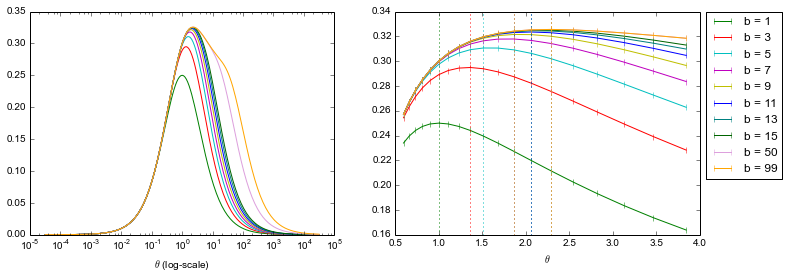

In [354]:
x_values = np.array(thetas_small_example)
y_values_dict = {}
b_list = (1,3,5,7,9,11,13,15,50,99)
y_labels = {}
colors = {0:'b',1:'g',3:'r',5:'c',7:'m',9:'y',11:'b',13:'teal',15:'darkgreen',50:'plum',99:'orange'}
for b in b_list:
    y_values = np.array([q_approx(b,t) for t in range(len(thetas_small_example))])
    y_values_dict[b] = y_values
    y_labels[b] = 'b = %i'%b

#y_values_1 = np.array( [probs_and_tables_b_up_to_100[i][1] )

plt.figure(4,figsize=(12,4),dpi=120)
plt.subplot(121)
#plt.subplot(111)
#plt.plot(x_values,x_values)

for b in b_list:
    plt.plot(x_values,y_values_dict[b], '-', color = colors[b], label = y_labels[b])
# for i in (3,4,5,8,9):
#     likelihhods = [solutions_AIS[(theta,pi2_AIS)][i] for theta in thetas]
#     plt.plot(thetas,likelihhods, label = labels[i], linestyle = styles[i], color = colors[i])
plt.xscale('log')
# plt.yscale('log')
plt.xlabel(r'$\theta$ (log-scale)')
# plt.ylabel('(log-scale)')
# plt.title(r'$\pi = \delta_{[0, 0]}$')

#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#plt.legend()

# figure_paths = generate_figure_paths('AIS_non-symetric_boundary_log-log')
# #for path in figure_paths:
#     #plt.savefig(path)
plt.subplot(122)

slicemin = 95
slicemax =114
for b in b_list:
    plt.plot(x_values[slicemin:slicemax],y_values_dict[b][slicemin:slicemax],'|-',color = colors[b], label = y_labels[b])
    plt.axvline(x_values[y_values_dict[b].argmax()],color = colors[b], linestyle='dotted')
#plt.xscale('log')
plt.xlabel(r'$\theta$')
#plt.gca().get_yaxis().set_ticklabels([])
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

figure_paths = generate_figure_paths('fig7','')
for path in figure_paths:
    plt.savefig(path)
    
plt.show()
plt.close()

In [319]:
x_values[45:55]

array([ 0.00334965,  0.00371535,  0.00412098,  0.00457088,  0.00506991,
        0.00562341,  0.00623735,  0.00691831,  0.00767361,  0.00851138])

In [320]:
probs_and_tables_b_up_to_100[len(thetas_small_example)/2][1].get_p(psi_test,1)

0.25

In [321]:
print matplotlib.__version__

1.3.1


In [322]:
c = matplotlib.colors.BoundaryNorm((0,1),5)

In [323]:
c.

SyntaxError: invalid syntax (<ipython-input-323-fcdd94312687>, line 1)

In [355]:
l = []

In [356]:
l.append([1,2,3])

In [357]:
l

[[1, 2, 3]]

In [358]:
zip(range(5),range(1,6))

[(0, 1), (1, 2), (2, 3), (3, 4), (4, 5)]